# KNN (K-Nearest Neighbors)
 - É um dos algoritmos de aprendizado de máquina mais simples e fáceis de entender. Ele utiliza a similaridade entre os k pontos mais proximos do dataset para estimar o valor das novas observações
 - No KNN todo o processamento ée feito no momento da previsão, por isso é chamado de "aprendizado pregiçoso(lazy learning)" - o que pode ser muito custoso em datasets maiores e em modelos que precisamos fazer previsão de forma imediata.
 - Por padrão cada ponto possui um peso igual, porem é possivel utilizar o hiperparametro 'wights' com o valor 'distance' para atribuir pesos diferentes aos pontos mais proximos.
 - Podemos usar os n pontos mais proximos ou os pontos dentro de um raio(RadiusNeightborsClassifier)

In [5]:
#parte pratica simples

import pandas as pd
#base de dados aleatoria apenas para exemplificar
dados = {
    'A': [1,1.5,2,1.5,-1,-0.5,0,-0.5],
    'A2': [-0.5,0,-0.5,-1,1.5,2,1.5,1],
    'B': [1,1.5,1,0.5,-1,-0.5,-1,-1.5],
    'B2': [-1.5,-1,-0.5,-1,0.5,1,1.5,1],
    'y': [1,1,1,1,0,0,0,0],
    'y2': [0,0,0,0,1,1,1,1]
}
dados = pd.DataFrame(dados)

In [7]:
#dados de previsão
dados_pred = {
    'A' : [2.5,1.8,0.5,-1,-1],
    'B' : [2,1,0,0,-1.5],
    'A2': [2.5,1.8,0.5,-1,-1],
    'B2': [2,1,0,0,-1.5]
}
dados_pred = pd.DataFrame(dados_pred)

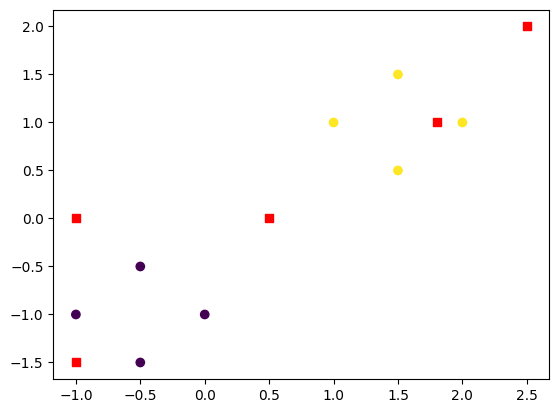

In [9]:
#Visualizando graficamente 

import matplotlib.pyplot as plt

fi,ax = plt.subplots()

ax.scatter(x = dados.A,
           y = dados.B,
           c = dados.y,
           cmap = "viridis",
           )
ax.scatter(x = dados_pred.A,
           y = dados_pred.B,
           c = 'r',marker='s')

plt.show()

So para exemplificação visualizamos esses dados aleatorios, para classificação deles, qual seria a melhor classificação para os pontos vermelhos?

### Vamos utilizar o KNN

In [10]:
#Importação do KNN
from sklearn.neighbors import KNeighborsClassifier


In [11]:
#criando o classificador
neigh  = KNeighborsClassifier(n_neighbors=3)

In [13]:
dados
X = dados[['A','B']]
y = dados.y

In [14]:
X_test = dados_pred[['A','B']]

In [15]:
neigh = neigh.fit(X, y)

In [18]:
y_pred = neigh.predict(X_test)

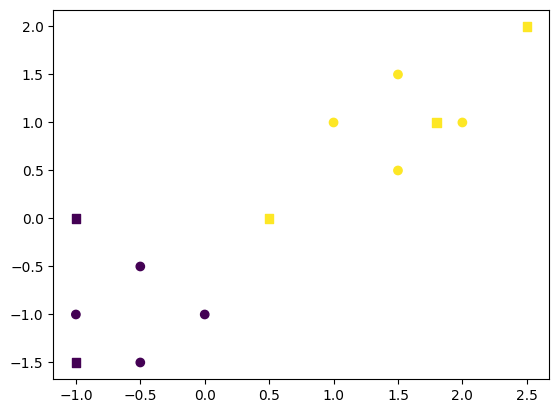

In [19]:
#incluindo os dados de treino na visualização dos dados de test
fi,ax = plt.subplots()

ax.scatter(x = dados.A,
           y = dados.B,
           c = dados.y,
           cmap = "viridis",
           )
ax.scatter(x = dados_pred.A,
           y = dados_pred.B,
           c = y_pred,marker='s')

plt.show()

#### por que o ponto do centro ficou amarelo?
 - Se dois vizinhos tiverem distancias identicas(calculadas pela distancia euclidiana) mas rotulos diferentes, o resultado dependera da ordenação dos dados de treinamento.

In [21]:
dados[['A', 'B','y']]

,A,B,y
0,1.0,1.0,1
1,1.5,1.5,1
2,2.0,1.0,1
3,1.5,0.5,1
4,-1.0,-1.0,0
5,-0.5,-0.5,0
6,0.0,-1.0,0
7,-0.5,-1.5,0


Se utilizassemos os valores de A2 e B2 ,que mudam os valores de ordem, o valor do meio que estaria amarelo, agora seria roxo.

Uma boa pratica para KNN é utilizar o numero de vizinhos impar, pois se for par tem mais chance de haver empate.

## Utilizando dados reais, vamos usar o iris do sklearn

In [30]:
#importando
from sklearn.datasets import load_iris
import pandas as pd

#retornando os dados
iris = load_iris()

#transofmrnaod em dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# data são os valores das colunas e os nomes das colunas são os frature_names
iris_df['target'] = iris.target

In [31]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Vamos fazer somente o target 1 e 2 e apenas as colunas de pétala

In [34]:
#selecionando as colunas
iris1 = iris_df.loc[iris_df.target.isin([1,2]),['petal length (cm)','petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [37]:
#Separando
X = iris1[['petal length (cm)','petal width (cm)']]
y = iris1.target

In [38]:
#separando os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

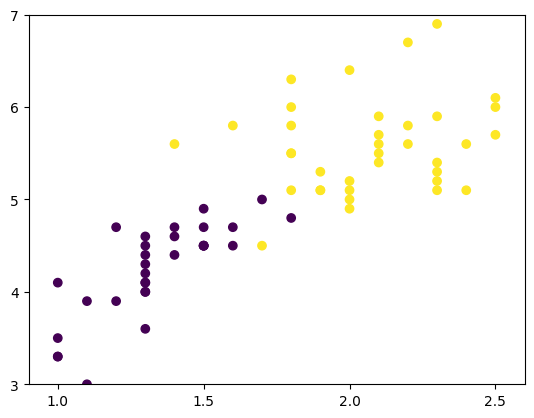

In [39]:
#visualizando os dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(
    x = X_train['petal width (cm)'],
    y = X_train['petal length (cm)'],
    c = y_train,
    cmap='viridis'
)

ax.set(xlim=(0.9,2.6),xticks=[1,1.5,2,2.5],
       ylim=(3,7),yticks=[3,4,5,6,7])
plt.show()

In [40]:
#agora usando o KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#fazendo o fit
clf.fit(X_train, y_train)
#fazendo a predição
y_pred = clf.predict(X_test)

In [58]:
y_pred

array([1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2])

In [41]:
#verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[19  0]
 [ 6  8]]


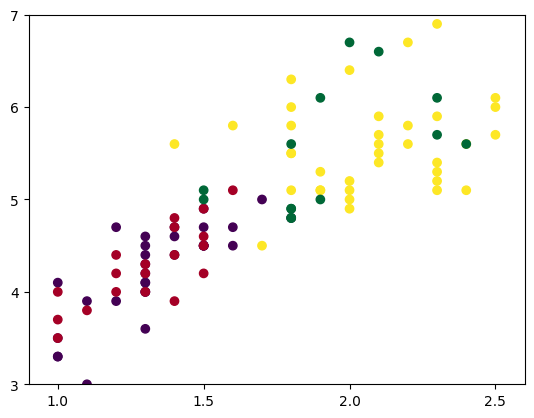

In [44]:
#visualizar os dados de treino e teste

fig, ax = plt.subplots()
ax.scatter(
    x = X_train['petal width (cm)'],
    y = X_train['petal length (cm)'],
    c = y_train,
    cmap='viridis'
)
ax.scatter(
    x = X_test['petal width (cm)'],
    y = X_test['petal length (cm)'],
    c = y_test,
    cmap='RdYlGn',
)
ax.set(xlim=(0.9,2.6),xticks=[1,1.5,2,2.5],
       ylim=(3,7),yticks=[3,4,5,6,7])
plt.show()

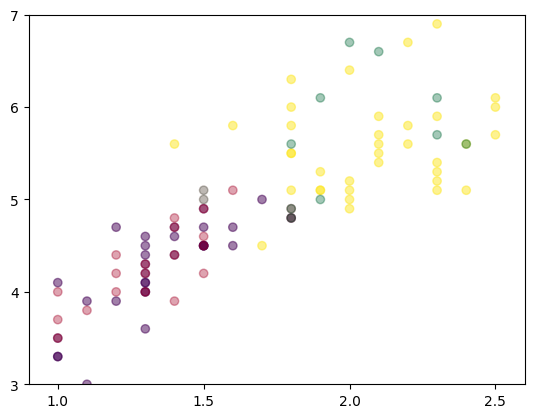

In [49]:
fig, ax = plt.subplots()
ax.scatter(
    x = X_train['petal width (cm)'],
    y = X_train['petal length (cm)'],
    c = y_train, alpha=0.5,
    cmap='viridis'
)
ax.scatter(
    x = X_test['petal width (cm)'],
    y = X_test['petal length (cm)'],
    c = y_pred, alpha=0.2,
    cmap='RdYlGn',
)
ax.scatter(
    x = X_test['petal width (cm)'],
    y = X_test['petal length (cm)'],
    c = y_test, alpha=0.2,
    cmap='RdYlGn',
)
ax.set(xlim=(0.9,2.6),xticks=[1,1.5,2,2.5],
       ylim=(3,7),yticks=[3,4,5,6,7])
plt.show()


In [50]:
X_test[y_test!=y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5


In [62]:
#metricas de avaliação
#precisão
from sklearn import metrics

print('Precisão: ', metrics.precision_score(y_test, y_pred,average='macro'))
print('Acurácia: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred,average='macro'))


Precisão:  0.88
Acurácia:  0.8181818181818182
Recall:  0.7857142857142857
